In [73]:
# 文件导入
import numpy as np 
import cv2 
import os 
import matplotlib.pyplot as plt 
import time 
import os.path as osp 
import xml.etree.ElementTree as ET


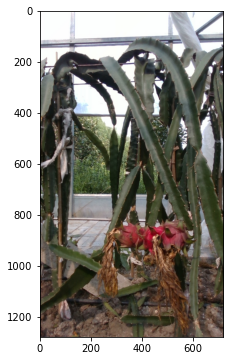

In [74]:
image = cv2.imread( '.\VOC2007\JPEGImages\color_HLG_000001.jpg')        
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)     
plt.rcParams[ 'figure.figsize' ] = [16, 6]                           
plt.imshow(image)       



In [75]:
# 读取 xml 
# 读取路径下的文件  
rootpath = './VOC2007/Annotations/'                         
   
xml_filepath = os.path.join(rootpath,'color_HLG_000001.xml')       
print(xml_filepath) 

updateTree = ET.parse(xml_filepath)  # parse xml documents into element tree
root = updateTree.getroot()      # return root element
# 修改sub1的name属性
rectangle_loc = [ ]

for obj in root.iter('object'):
     cls = obj.find('name').text
     if cls == 'pitaya':
        xmlbox = obj.find('bndbox')
        b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
        rectangle_loc.append(b)
     else:
        print( 'no target' )

./VOC2007/Annotations/color_HLG_000001.xml


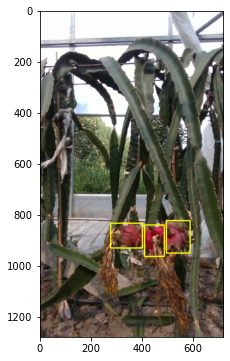

In [84]:

#绘制方框
for i_num in range(len(rectangle_loc)):
    xmin, ymin, xmax, ymax = rectangle_loc[i_num]

    IMG_rec = cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 255, 0), 3) 
    plt.imshow(IMG_rec)

    IMG_rec = cv2.cvtColor(IMG_rec, cv2.COLOR_BGR2RGB) 
    cv2.imwrite('box_img.jpg', IMG_rec)